# Introduction

Hello, Before this, I shared the name of Classification With CNN And ResNet - PyTorch - CPU project. This project is the continuation of that project I shared. The difference between this project from the project I shared, I will use GPU in this project and I will observe differents. In this project, there are only codes. If you want to look detailed version of this project [click here.](https://www.kaggle.com/code/ihsncnkz/classification-with-cnn-and-resnet-pytorch-cpu) In the detailed version, I gave information about the data set. 

**In this project, Information about what I did:** <br>
My purpose of prepare this notebook is because I want to improve myself about the Pytorch and the ResNet. In this notebook, I will use two models of Deep Learning. These are the Residual neural network(ResNet) and Convolutional Neural Network(CNN). I will constitute these models with Pytorch. Firstly, I will prepare the dataset for the models. After I will visualize two images from the dataset I have prepared. After preparing the dataset, I will prepare the models with PyTorch. After I will start training with prepared models. Finally, I will visualize the results of the models. The general operation of this notebook will be like this. At the same time, We will look the difference between the results of the ResNet and CNN models.

With this project, I continue to add knowledge to my knowledge. At the moment, I'm on a learning path. I started this learning path with data science and then continued with machine learning and now I am learning deep learning topics. It is in my projects that I have done before this project. I will share those projects in this chapter. In this learning path, I would be very happy if you would examine my notebook and help me with how to improve my notebook or what I should do in this development path. I wish you a good day and good work.

My projects about Deep Learning:<br>
- [Gender Prediction With Logistic Regression](https://www.kaggle.com/code/ihsncnkz/gender-prediction-with-logistic-regression)
- [Cat And Dog Prediction With ANN](https://www.kaggle.com/code/ihsncnkz/cat-and-dog-prediction-with-ann)
- [Linear Regression With Pytorch](https://www.kaggle.com/code/ihsncnkz/linear-regression-with-pytorch)
- [My First Convolutional Neural Network(CNN) Work](https://www.kaggle.com/code/ihsncnkz/my-first-convolutional-neural-network-cnn-work)
- [Predict With CNN Model](https://www.kaggle.com/code/ihsncnkz/predict-with-cnn-model)
- [Logistic Regression, ANN And CNN With Pytorch](https://www.kaggle.com/code/ihsncnkz/logistic-regression-ann-and-cnn-with-pytorch)
- [RNN And LSTM With Keras](https://www.kaggle.com/code/ihsncnkz/rnn-and-lstm-with-keras)
- [Classification With CNN And ResNet - PyTorch - CPU](https://www.kaggle.com/code/ihsncnkz/classification-with-cnn-and-resnet-pytorch-cpu)

My projects about Data Science and Machine Learning:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)

# Content <a id = "cont"></a>
- [Convolutional Neural Network(CNN)](#1)
    - [Load And Prepare Dataset](#1a)
        - [Load Train Negative](#1aa)
        - [Load Train Positive](#1ab)
        - [Concat Train](#1ac)
        - [Load Test Negative](#1ad)
        - [Load Test Positive](#1ae)
        - [Concat Test](#1af)
        - [Create Tensor](#1ag)
    - [Visualizetion](#1b)
    - [Create Model](#1c)
    - [Traning Model](#1d)
    - [Visualize The Results](#1e)
- [Residual neural network(ResNet)](#2)
    - [Load and Prepare Dataset](#2a)
        - [Load Train Negative](#2aa)
        - [Load Train Positive](#2ab)
        - [Concat Train](#2ac)
        - [Load Test Negative](#2ad)
        - [Load Test Positive](#2ae)
        - [Concat Test](#2af)
        - [Create Tensor](#2ag)
    - [Visualization](#2b)
    - [Create Model](#2c)
    - [Training Model](#2d)
    - [Visualize The Result](#2e)
- [CONCLUSION](#3)

In [1]:
# İmport Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torch.optim as optim
from PIL import Image
import time

**Device confic Ekstra**<br>
If you want to use GPU, You apply the codes below.

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() == True else "cpu")
print("Device:", device)

Device: cuda


# Convolutional Neural Network(CNN) <a id = "1"></a>
[Go Content](#cont)

## Load And Prepare Dataset <a id = "1a"></a>
[Go Content](#cont)

In [3]:
# Data Load Function
def read_images(path, numberofImage):
    array = np.zeros([numberofImage, 64*32])
    i = 0
    for img in os.listdir(path):
        img_path = path + "/" + img
        img = Image.open(img_path, mode = "r")
        data = np.asarray(img, dtype = "uint8")
        data = data.flatten()
        array[i,:] = data
        i += 1
    return array

### Load Train Negative <a id = "1aa"></a>
[Go Content](#cont)

In [4]:
Train_neg_path = r"../input/lsifir/LSIFIR/Classification/Train/neg"
num_Train_neg_img = 43390
Train_neg_array = read_images(Train_neg_path, num_Train_neg_img)

In [5]:
x_Train_neg_Tensor = torch.from_numpy(Train_neg_array)
print("Size of x_Train_neg_Tensor: ", x_Train_neg_Tensor.size())

# I specify negative images as zero.
y_Train_neg_Tensor = torch.zeros(num_Train_neg_img, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_Train_neg_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([43390, 2048])
Size of y_Train_neg_Tensor:  torch.Size([43390])


### Load Train Positive <a id="1ab"></a>
[Go Content](#cont)

In [6]:
Train_pos_path = r"../input/lsifir/LSIFIR/Classification/Train/pos"
num_Train_pos_img = 10208
Train_pos_array = read_images(Train_pos_path, num_Train_pos_img)

In [7]:
x_Train_pos_Tensor = torch.from_numpy(Train_pos_array)
print("Size of x_Train_pos_Tensor: ", x_Train_pos_Tensor.size())

# I specify positive images as one.
y_Train_pos_Tensor = torch.ones(num_Train_pos_img, dtype = torch.long)
print("Size of y_Train_pos_Tensor: ", y_Train_pos_Tensor.size())

Size of x_Train_pos_Tensor:  torch.Size([10208, 2048])
Size of y_Train_pos_Tensor:  torch.Size([10208])


### Concat Train <a id = "1ac"></a>
[Go Content](#cont)

In [8]:
X_train = torch.cat((x_Train_neg_Tensor, x_Train_pos_Tensor),0)
Y_train = torch.cat((y_Train_neg_Tensor, y_Train_pos_Tensor),0)

print("Size of X_train: ",X_train.size())
print("Size of Y_train: ",Y_train.size()) 

Size of X_train:  torch.Size([53598, 2048])
Size of Y_train:  torch.Size([53598])


### Load Test Negative <a id = "1ad"></a>
[Go Content](#cont)

In [9]:
Test_neg_path = r"../input/lsifir/LSIFIR/Classification/Test/neg"
num_Test_neg_img = 22050
Test_neg_array = read_images(Test_neg_path, num_Test_neg_img)

In [10]:
x_Test_neg_Tensor = torch.from_numpy(Test_neg_array[:20855,:])
print("Size of x_Train_neg_Tensor: ", x_Test_neg_Tensor.size())

# I specify negative images as zero.
y_Test_neg_Tensor = torch.zeros(20855, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_Test_neg_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([20855, 2048])
Size of y_Train_neg_Tensor:  torch.Size([20855])


### Load Test Positive <a id = "1ae"></a>
[Go Content](#cont)

In [11]:
Test_pos_path = r"../input/lsifir/LSIFIR/Classification/Test/pos"
num_Test_pos_img = 5944
Test_pos_array = read_images(Test_pos_path, num_Test_pos_img)

In [12]:
x_Test_pos_Tensor = torch.from_numpy(Test_pos_array)
print("Size of x_Train_neg_Tensor: ", x_Test_pos_Tensor.size())

# I specify positive images as one.
y_Test_pos_Tensor = torch.ones(num_Test_pos_img, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_Test_pos_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([5944, 2048])
Size of y_Train_neg_Tensor:  torch.Size([5944])


### Concat Test <a id = "1af"></a>
[Go Centent](#cont)

In [13]:
X_test = torch.cat((x_Test_neg_Tensor, x_Test_pos_Tensor),0)
Y_test = torch.cat((y_Test_neg_Tensor, y_Test_pos_Tensor),0)

print("Size of X_train: ",X_test.size())
print("Size of Y_train: ",Y_test.size()) 

Size of X_train:  torch.Size([26799, 2048])
Size of Y_train:  torch.Size([26799])


### Create Tensor <a id = "1ag"></a>
[Go Content](#cont)

In [14]:
batch_size = 8933

train = torch.utils.data.TensorDataset(X_train, Y_train)
trainloader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)

test = torch.utils.data.TensorDataset(X_test, Y_test)
testloader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

## Visualizetion <a id = "1b"></a>
[Go Content](#cont)

(-0.5, 31.5, 63.5, -0.5)

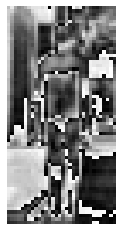

In [15]:
# Image 1 from x_train
plt.imshow(X_train[44301,:].reshape(64,32),cmap = "gray")
plt.axis("off")

(-0.5, 31.5, 63.5, -0.5)

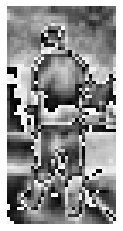

In [16]:
# Image 2 from x_test
plt.imshow(X_test[25100,:].reshape(64,32),cmap = "gray")
plt.axis("off")

## Create Model <a id = "1c"></a>
[Go Content](#cont)

In [17]:
# Hyper Parameter
numberofepochs = 100
numberofclass = 2
learning_rate = 0.00001

# Create Class
class CNNmodel(nn.Module):
    def __init__(self):
        super(CNNmodel,self).__init__()
        
        self.conv1 = nn.Conv2d(1,10,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(10,16,5)
        
        self.fc1 = nn.Linear(16*13*5,520)
        self.fc2 = nn.Linear(520,130)
        self.fc3 = nn.Linear(130,numberofclass)
        
    def forward(self, out):
        out = self.pool(F.relu((self.conv1(out))))
        out = self.pool(F.relu(self.conv2(out)))
        
        out = out.view(-1,16*13*5)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        
        return out
    
CNNmodel = CNNmodel().to(device)
# If you want to use GPU, You use the code below
# CNNmodel = CNNmodel().to(device) 

# Loss And Optimizer
cnn_criterion = nn.CrossEntropyLoss() # For calculate loss

cnn_optimizer = optim.SGD(CNNmodel.parameters(), lr = learning_rate, momentum = 0.8) # For optimize weight and bias

## Traning Model <a id = "1d"></a>
[Go Content](#cont)

In [18]:
# time of start
start = time.time()
cnn_train_acc = []
cnn_test_acc = []
cnn_loss_list = []

use_gpu = True # If you want to use GPU, Change True

# Training

for epoch in range(numberofepochs):
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        inputs = inputs.view(batch_size, 1, 64, 32)
        inputs = inputs.float()
        
        # use gpu
        if use_gpu:
            if torch.cuda.is_available():
                inputs, labels = inputs.to(device), labels.to(device)
                
        # zero gradient
        cnn_optimizer.zero_grad()
        
        # forward
        cnn_outputs = CNNmodel(inputs)
        
        # loss
        cnn_loss = cnn_criterion(cnn_outputs, labels)
        
        # backward
        cnn_loss.backward()
        
        # update weights
        cnn_optimizer.step()
        
    # Test
    #print("Number Of Epoch: ",epoch)
    cnn_test_correct = 0
    cnn_test_total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            
            images = images.view(batch_size, 1, 64, 32)
            images = images.float()
            
            # use gpu
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)
            
            outputs = CNNmodel(images)
            _, predicted = torch.max(outputs.data, 1)
            
            cnn_test_total += labels.size(0)
            cnn_test_correct += (predicted == labels).sum().item()
    test_acc = 100* cnn_test_correct / cnn_test_total
    #print("Accuracy Test: ",test_acc)
    cnn_test_acc.append(test_acc)
    
    # Train
    cnn_train_correct = 0
    cnn_train_total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            
            images = images.view(batch_size, 1, 64, 32)
            images = images.float()
            
            # use gpu
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)
            
            outputs = CNNmodel(images)
            _, predicted = torch.max(outputs.data, 1)
            
            cnn_train_total += labels.size(0)
            cnn_train_correct += (predicted == labels).sum().item()
    train_acc = 100* cnn_train_correct / cnn_train_total
    #print("Accuracy Train: ",train_acc)
    cnn_train_acc.append(train_acc)
    
    cnn_loss_list.append(cnn_loss.item())
    #print("loss: ",cnn_loss.item())
    
    print("Epoch: {} | Accuracy Train: {} | Accuracy Test: {} | Loss: {} ".format(epoch, train_acc, test_acc, cnn_loss.item()))

print("Training is Done")

# time of end
end = time.time()
process_time = (end - start)/60
print("Process Time: ",process_time)

Epoch: 0 | Accuracy Train: 73.0419045486772 | Accuracy Test: 70.1742602335908 | Loss: 0.8405959606170654 
Epoch: 1 | Accuracy Train: 77.13720661218703 | Accuracy Test: 74.39456696145379 | Loss: 0.9112182259559631 
Epoch: 2 | Accuracy Train: 72.95608045076308 | Accuracy Test: 69.8309638419344 | Loss: 0.7920814156532288 
Epoch: 3 | Accuracy Train: 71.0175752826598 | Accuracy Test: 67.84954662487407 | Loss: 0.7382070422172546 
Epoch: 4 | Accuracy Train: 74.08112242994142 | Accuracy Test: 70.71159371618344 | Loss: 0.7318483591079712 
Epoch: 5 | Accuracy Train: 74.94869211537744 | Accuracy Test: 71.6967051009366 | Loss: 0.6972607374191284 
Epoch: 6 | Accuracy Train: 74.9990671293705 | Accuracy Test: 71.60714952050449 | Loss: 0.6762188673019409 
Epoch: 7 | Accuracy Train: 75.36288667487592 | Accuracy Test: 71.95417739467891 | Loss: 0.6481812596321106 
Epoch: 8 | Accuracy Train: 76.06813687077876 | Accuracy Test: 72.65569610806374 | Loss: 0.6501365303993225 
Epoch: 9 | Accuracy Train: 76.3218

## Visualize The Results <a id = "1e"></a>
[Go Content](#cont)

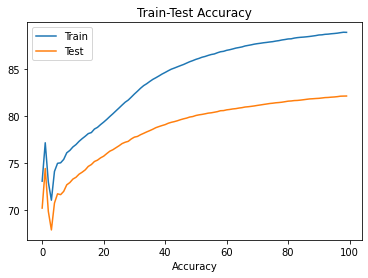

In [19]:
# Train and Test accuracy graphic
epochs = []
for i in range(numberofepochs):
    epochs.append(i)

plt.plot(epochs, cnn_train_acc, label="Train")
plt.plot(epochs, cnn_test_acc, label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.xlabel("Accuracy")
plt.legend()
plt.show()

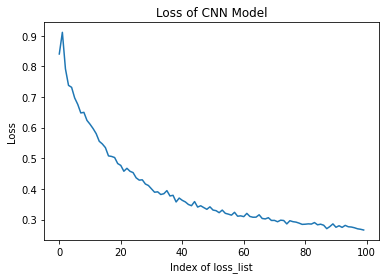

In [20]:
# Loss of cnn model graphic
plt.plot(cnn_loss_list)
plt.title("Loss of CNN Model")
plt.xlabel("Index of loss_list")
plt.ylabel("Loss")
plt.show()

# Residual neural network(ResNet) <a id = "2"></a>
[Go Content](#cont)

## Load and Prepare Dataset <a id = "2a"></a>
[Go Content](#cont)

### Load Train Negative <a id = "2aa"></a>
[Go Content](#cont)

In [21]:
res_Train_neg_path = r"../input/lsifir/LSIFIR/Classification/Train/neg"
res_num_Train_neg_img = 43390
res_Train_neg_array = read_images(res_Train_neg_path, res_num_Train_neg_img)

In [22]:
x_res_Train_neg_Tensor = torch.from_numpy(res_Train_neg_array[:42000,:])
print("Size of x_Train_neg_Tensor: ", x_res_Train_neg_Tensor.size())

# I specify negative images as zero.
y_res_Train_neg_Tensor = torch.zeros(42000, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_res_Train_neg_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([42000, 2048])
Size of y_Train_neg_Tensor:  torch.Size([42000])


### Load Train Positive <a id = "2ab"></a>
[Go Content](#cont)

In [23]:
res_Train_pos_path = r"../input/lsifir/LSIFIR/Classification/Train/pos"
res_num_Train_pos_img = 10208
res_Train_pos_array = read_images(res_Train_pos_path, res_num_Train_pos_img)

In [24]:
x_res_Train_pos_Tensor = torch.from_numpy(res_Train_pos_array[:10000,:])
print("Size of x_Train_pos_Tensor: ", x_res_Train_pos_Tensor.size())

# I specify negative images as one.
y_res_Train_pos_Tensor = torch.ones(10000, dtype = torch.long)
print("Size of y_Train_pos_Tensor: ", y_res_Train_pos_Tensor.size())

Size of x_Train_pos_Tensor:  torch.Size([10000, 2048])
Size of y_Train_pos_Tensor:  torch.Size([10000])


### Concat Train <a id = "2ac"></a>
[Go Content](#cont)

In [25]:
X_res_train = torch.cat((x_res_Train_neg_Tensor, x_res_Train_pos_Tensor),0)
Y_res_train = torch.cat((y_res_Train_neg_Tensor, y_res_Train_pos_Tensor),0)

print("Size of X_train: ",X_res_train.size())
print("Size of Y_train: ",Y_res_train.size()) 

Size of X_train:  torch.Size([52000, 2048])
Size of Y_train:  torch.Size([52000])


### Load Test Negative <a id = "2ad"></a>
[Go Content](#cont)

In [26]:
res_Test_neg_path = r"../input/lsifir/LSIFIR/Classification/Test/neg"
res_num_Test_neg_img = 22050
res_Test_neg_array = read_images(res_Test_neg_path, res_num_Test_neg_img)

In [27]:
x_res_Test_neg_Tensor = torch.from_numpy(res_Test_neg_array[:18056,:])
print("Size of x_Train_neg_Tensor: ", x_res_Test_neg_Tensor.size())

# I specify negative images as zero.
y_res_Test_neg_Tensor = torch.zeros(18056, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_res_Test_neg_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([18056, 2048])
Size of y_Train_neg_Tensor:  torch.Size([18056])


### Load Test Positive <a id = "2ae"></a>
[Go Content](#cont)

In [28]:
res_Test_pos_path = r"../input/lsifir/LSIFIR/Classification/Test/pos"
res_num_Test_pos_img = 5944
res_Test_pos_array = read_images(res_Test_pos_path, res_num_Test_pos_img)

In [29]:
x_res_Test_pos_Tensor = torch.from_numpy(res_Test_pos_array)
print("Size of x_Train_neg_Tensor: ", x_res_Test_pos_Tensor.size())

# I specify negative images as one.
y_res_Test_pos_Tensor = torch.ones(res_num_Test_pos_img, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_res_Test_pos_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([5944, 2048])
Size of y_Train_neg_Tensor:  torch.Size([5944])


### Concat Test <a id = "2af"></a>
[Go Content](#cont)

In [30]:
X_res_test = torch.cat((x_res_Test_neg_Tensor, x_res_Test_pos_Tensor),0)
Y_res_test = torch.cat((y_res_Test_neg_Tensor, y_res_Test_pos_Tensor),0)

print("Size of X_train: ",X_res_test.size())
print("Size of Y_train: ",Y_res_test.size()) 

Size of X_train:  torch.Size([24000, 2048])
Size of Y_train:  torch.Size([24000])


### Create Tensor <a id = "2ag"></a>
[Go Content](#cont)

In [31]:
res_batch_size = 2000

# Last prepare data
res_train = torch.utils.data.TensorDataset(X_res_train, Y_res_train)
res_trainloader = torch.utils.data.DataLoader(res_train, batch_size = res_batch_size, shuffle = True)

res_test = torch.utils.data.TensorDataset(X_res_test, Y_res_test)
res_testloader = torch.utils.data.DataLoader(res_test, batch_size = res_batch_size, shuffle = False)

## Visualization <a id = "2b"></a>
[Go Content](#cont)

(-0.5, 31.5, 63.5, -0.5)

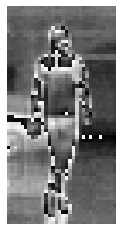

In [32]:
# Image from x_res_train
plt.imshow(X_res_train[45501,:].reshape(64,32),cmap = "gray")
plt.axis("off")

(-0.5, 31.5, 63.5, -0.5)

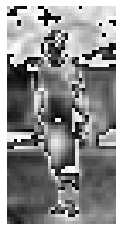

In [33]:
# Image from X_res_test
plt.imshow(X_res_test[21000,:].reshape(64,32),cmap = "gray")
plt.axis("off")

## Create Model <a id = "2c"></a>
[Go Content](#cont)

In [34]:
# Hyper Parameters
res_numberofepochs = 100
res_numberofclasses = 2
res_learning_rate = 0.0001

def conv3x3(in_planes, out_planes, stride = 1):
    return nn.Conv2d(in_planes, out_planes, kernel_size = 3, stride = stride, padding = 1, bias = False)

def conv1x1(in_planes, out_planes, stride = 1):
    return nn.Conv2d(in_planes, out_planes, kernel_size = 1, stride = stride, bias = False)

In [35]:
# Create Class
class ResNetBasicBlock(nn.Module):
    
    expansion = 1
    
    def __init__(self, inplanes, planes, stride = 1, downsample = None):
        super(ResNetBasicBlock,self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace = True)
        self.drop = nn.Dropout(0.9)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
        
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.drop(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.drop(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        out = out + identity
        out = self.relu(out)
        return out

In [36]:
class ResNet(nn.Module):
    
    def __init__(self, block, layers, num_classes = res_numberofclasses):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Conv2d(1, 64, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        self.layer1 = self._make_layer(block, 64, layers[0], stride = 1)
        self.layer2 = self._make_layer(block, 128, layers[1], stride = 2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride = 2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(256*block.expansion, res_numberofclasses)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode = "fan_out", nonlinearity = "relu")
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
                
    
    def _make_layer(self, block, planes, blocks, stride = 1):
        downsample = None
        
        if stride != 1 or self.inplanes != planes*block.expansion:
            downsample = nn.Sequential(conv1x1(self.inplanes, planes * block.expansion, stride),
                                      nn.BatchNorm2d(planes*block.expansion))
            
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes*block.expansion
        for _ in range(1,blocks):
            layers.append(block(self.inplanes, planes))
            
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        
        return x
    

# For CPU 
#res_model = ResNet(ResNetBasicBlock, [2,2,2])

res_model = ResNet(ResNetBasicBlock, [2,2,2]).to(device)

res_criterion = nn.CrossEntropyLoss()

res_optimizer = torch.optim.Adam(res_model.parameters(), lr = res_learning_rate)

## Training Model <a id = "2d"></a>
[Go Content](#cont)

In [37]:
res_start = time.time() # start of time
res_train_acc = []
res_test_acc = []
res_loss_list = []

use_gpu = True # If you want to use GPU, Change True

res_total_step = len(res_trainloader)

for epoch in range(res_numberofepochs):
    for i, (images, labels) in enumerate(res_trainloader):
        
        images = images.view(res_batch_size, 1, 64, 32)
        images = images.float()
        
        # GPU
        if use_gpu:
            if torch.cuda.is_available():
                images, labels = images.to(device), labels.to(device)
                
        outputs = res_model(images)
        
        loss = res_criterion(outputs, labels)
        
        # backward and optimization
        res_optimizer.zero_grad()
        loss.backward()
        res_optimizer.step()
        """
        if i % 2 == 0:
            print("epoch: {} {}\{}".format(epoch, i, res_total_step))
        """ 
    # train
    res_train_correct = 0
    res_train_total = 0
    with torch.no_grad():
        for data in res_trainloader:
            images, labels = data
            images = images.view(res_batch_size, 1, 64, 32)
            images = images.float()
            
            # GPU
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)
                    
            outputs = res_model(images)
            _, predicted = torch.max(outputs.data, 1)
            res_train_total += labels.size(0)
            res_train_correct += (predicted == labels).sum().item()
            
    Accuracy_Train = 100* res_train_correct/res_train_total
    #print("Accuracy Train: "(Accuracy_Train)
    res_train_acc.append(Accuracy_Train)
    
    # test
    res_test_correct = 0
    res_test_total = 0
    with torch.no_grad():
        for data in res_testloader:
            images, labels = data
            images = images.view(res_batch_size, 1, 64, 32)
            images = images.float()
            
            # GPU
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)
                    
            outputs = res_model(images)
            _, predicted = torch.max(outputs.data, 1)
            res_test_total += labels.size(0)
            res_test_correct += (predicted == labels).sum().item()
          
    Accuracy_Test = 100* res_test_correct/res_test_total
    #print("Accuracy Test: "(Accuracy_Test)
    res_test_acc.append(Accuracy_Test)
    
    res_loss_list.append(loss.item())
          
    print("Epoch: {} | Accuracy Train: {} | Accuracy Test: {} | Loss: {} ".format(epoch, Accuracy_Train, Accuracy_Test, loss.item()))
    
print("Training is Done")

# time of end
res_end = time.time()
res_process_time = (res_end - res_start)/60
print("Process Time: ",res_process_time)

Epoch: 0 | Accuracy Train: 79.65192307692308 | Accuracy Test: 74.3125 | Loss: 0.525749683380127 
Epoch: 1 | Accuracy Train: 79.90961538461538 | Accuracy Test: 74.0125 | Loss: 0.4947313964366913 
Epoch: 2 | Accuracy Train: 79.82692307692308 | Accuracy Test: 71.65 | Loss: 0.40799176692962646 
Epoch: 3 | Accuracy Train: 80.60961538461538 | Accuracy Test: 69.56666666666666 | Loss: 0.37819191813468933 
Epoch: 4 | Accuracy Train: 82.69807692307693 | Accuracy Test: 69.27916666666667 | Loss: 0.33850589394569397 
Epoch: 5 | Accuracy Train: 84.41538461538461 | Accuracy Test: 68.525 | Loss: 0.3062596321105957 
Epoch: 6 | Accuracy Train: 85.4826923076923 | Accuracy Test: 67.7875 | Loss: 0.29107916355133057 
Epoch: 7 | Accuracy Train: 86.96923076923076 | Accuracy Test: 68.41666666666667 | Loss: 0.2708948254585266 
Epoch: 8 | Accuracy Train: 88.03653846153846 | Accuracy Test: 68.2625 | Loss: 0.25301626324653625 
Epoch: 9 | Accuracy Train: 88.92692307692307 | Accuracy Test: 67.75416666666666 | Loss: 

## Visualize The Result <a id = "2e"></a>
[Go Content](#cont)

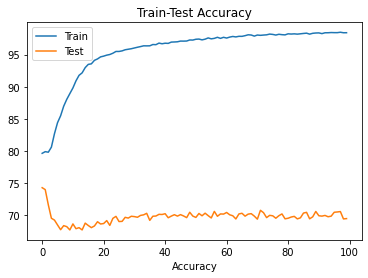

In [38]:
# Train and Test accuracy graphic
res_epochs = []
for i in range(res_numberofepochs):
    res_epochs.append(i)

plt.plot(res_epochs, res_train_acc, label="Train")
plt.plot(res_epochs, res_test_acc, label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.xlabel("Accuracy")
plt.legend()
plt.show()

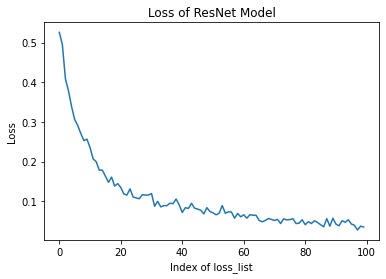

In [39]:
# Loss of cnn model graphic
plt.plot(res_loss_list)
plt.title("Loss of ResNet Model")
plt.xlabel("Index of loss_list")
plt.ylabel("Loss")
plt.show()

# CONCLUSION <a id = "3"></a>
---
[Go Content](#cont)

I arrived end of the project. In this project, I trained very quickly using GPU. If you want to see the results of the project where I use CPU, please [click here](https://www.kaggle.com/code/ihsncnkz/classification-with-cnn-and-resnet-pytorch-cpu) and You can make comparisons between projects. My view is that the CPU has done a slow training with these models but GPU, on the other hand, completed a hundred-step training in a very short time.

I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.